In [235]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
df = pd.read_csv("xyz.csv")
x= df['Longitud']
y= df['Latitud']
z= df['Profundidad']

In [202]:
df

,Longitud,Latitud,Profundidad
0,-94.61,15.14,23
1,-94.40,15.20,16
2,-94.66,15.37,18
3,-94.29,14.94,16
4,-94.34,15.10,19
...,...,...,...
945,-94.65,15.29,29
946,-94.64,15.24,13
947,-94.85,15.62,32
948,-94.11,14.85,58


In [164]:
print(z)

0      23
1      16
2      18
3      16
4      19
       ..
945    29
946    13
947    32
948    58
949    31
Name: Profundidad, Length: 950, dtype: int64


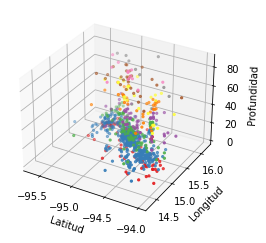

In [178]:
fig = plt.figure()

ax=fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z, c=z, cmap='Set1', marker='.')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
ax.set_zlabel('Profundidad')
plt.show()

In [179]:
def coste(x,y,z,a,b,c):
    m=len(x)
    error=0.0
    for i in range(m):
        hip=a*x[i]+b*y[i]+c
        error+=(z[i]-hip)**2
    return error/(2*m)

In [230]:
def dG(x,y,z,a,b,c,alpha,epochs):
    m=len(x)
    hcost=[]
    for ep in range(epochs):
        a_deriv=0.0; b_deriv=0.0; c_deriv=0.0
        for i in range(m):
            hip=a*x[i]+b*y[i]+c
            c_deriv+=hip-z[i]
            a_deriv+=(hip-z[i])*x[i]
            b_deriv+=(hip-z[i])*y[i]

        a-=(a_deriv/m)*alpha
        b-=(b_deriv/m)*alpha
        c-=(c_deriv/m)*alpha
    return a,b,c,hcost

In [232]:
a=1; b=1; c=1; alpha=0.0001; epochs= 100;
a,b,c,historial=dG(x,y,z,a,b,c,alpha,epochs)

In [233]:
print(a,b,c)


-0.03986192266570747 1.1826632647427815 1.0109429272961497


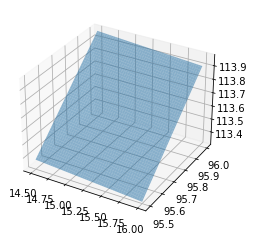

In [234]:
Res=100
x1,y1=np.linspace(14.5,16,Res),np.linspace(95.5,96,Res)
X1,Y1=np.meshgrid(x1,y1)

Z1=(a)*X1+(b)*Y1+c

fig=plt.figure()
pl=fig.add_subplot(111,projection='3d')
#pl.scatter3D(y,x,z, c=z, cmap='Set1', marker='.')
pl.plot_surface(X1,Y1,Z1,alpha=0.5)
plt.show()


In [171]:

th=[]
th.append(a)
th.append(b)
th.append(c)

print(th)
fc=lambda th: th[0]*x+th[1]*y+th[2]
Res=100
X=np.linspace(13,16,Res)
Y=np.linspace(93,96,Res)
Z=np.zeros((len(X),len(X)))
i=0

for i in range(len(X)-1):
    Z[i]=a*X[i]+b*y[i]+c


[-0.03986192266570747, 1.1826632647427815, 1.0109429272961497]


In [172]:
print(Z)

[[18.39825976 18.39825976 18.39825976 ... 18.39825976 18.39825976
  18.39825976]
 [18.46801162 18.46801162 18.46801162 ... 18.46801162 18.46801162
  18.46801162]
 [18.66785644 18.66785644 18.66785644 ... 18.66785644 18.66785644
  18.66785644]
 ...
 [18.38752956 18.38752956 18.38752956 ... 18.38752956 18.38752956
  18.38752956]
 [18.12613571 18.12613571 18.12613571 ... 18.12613571 18.12613571
  18.12613571]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [173]:
fig=plt.figure

Res=100
xi=np.linspace(13,16,Res)
yi=np.linspace(93,96,Res)
XI,YI=np.meshgrid(xi,yi)

def Z(XI,YI):
    return a*xi+b*yi+c

Ax.plot(XI,YI,z(XI,YI))
plt.show


NameError: name 'Ax' is not defined

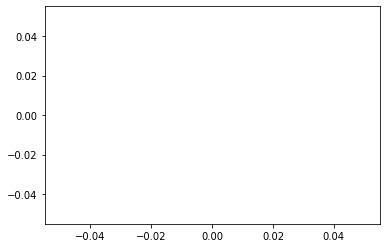

In [ ]:
ite=np.arange(1,len(historial)+1)
plt.plot(ite,historial)
#plt.ylim([0,949])
plt.show()

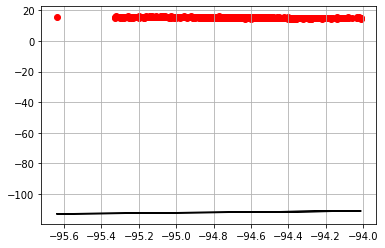

In [236]:
y_new=b*np.array(x)+a

plt.scatter(x, y,color='red')
plt.plot(x,y_new,color='black')
plt.grid()

In [ ]:
y=np.array(y)
LA.norm(y_new-y)

NameError: name 'LA' is not defined

In [ ]:
print(len(x))

950


In [243]:
print(f'La ecuación del plano es: {a}x+{b}y+{c}')

La ecuación del plano es: -0.03986192266570747x+1.1826632647427815y+1.0109429272961497
